# Introduction to OpenCV

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual

In [24]:
plt.rcParams["figure.figsize"] = (15,7) # change the plot size of matplotlib

In [2]:
#ls

In [3]:
# Load a color image in grayscale
img_gray = cv.imread('beach.JPG',0)    # this function does not throw an error if the path is not correct!
# TODO: Add information about the flags cv.IMREAD_COLOR, cv.IMREAD_GRAYSCALE and cv.IMREAD_UNCHANGED 

## Displaying images

In [4]:
# Displaying an image in an image window. The window will be sized according to the image
# Depending on the screen layout the window might be hidden behind your current working window!

cv.imshow('image',img_gray)   # the first argument is the window name
cv.waitKey(0)                 # the window will close after "x" milliseconds, if "0" it waits for any keystroke
cv.destroyAllWindows() 

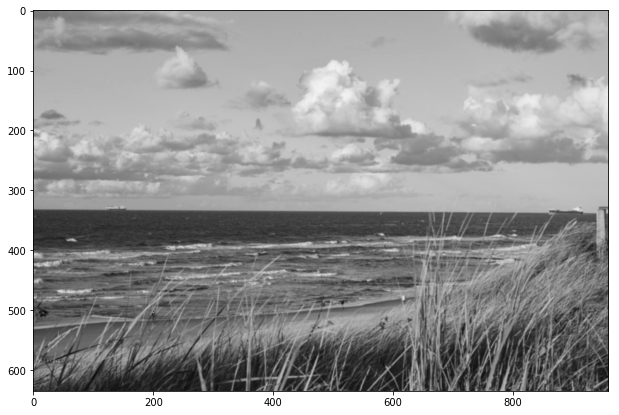

In [25]:
# Displaying an image with matplotlib
plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')      # TODO: explanation about interpolation
#plt.xticks([]), plt.yticks([])                                     # to hide tick values on X and Y axis
plt.show()

## Writing images

In [6]:
cv.imwrite('beachgray.png',img_gray)    # first argument is name of image, second is image
# TODO: Does cv.imwrite() overwrite exisiting files?
# TODO: What are the supported file formats for saving images?

True

## Creating binary images from grayscale image

In [18]:
# @interact                                     # running with interact is too slow
@interact_manual
def display_binary(thresh_val=(0,255,1)):
    _,thresh1 = cv.threshold(img_gray, thresh_val, 255,cv.THRESH_BINARY)
    plt.imshow(thresh1, cmap = 'gray', interpolation = 'bicubic') 
    plt.show()
    return #thresh1; 

interactive(children=(IntSlider(value=127, description='thresh_val', max=255), Button(description='Run Interac…

In [19]:
thresh_val = 138
_, img_binary = cv.threshold(img_gray, thresh_val, 255,cv.THRESH_BINARY)

## 2D Convolution ( Image Filtering )

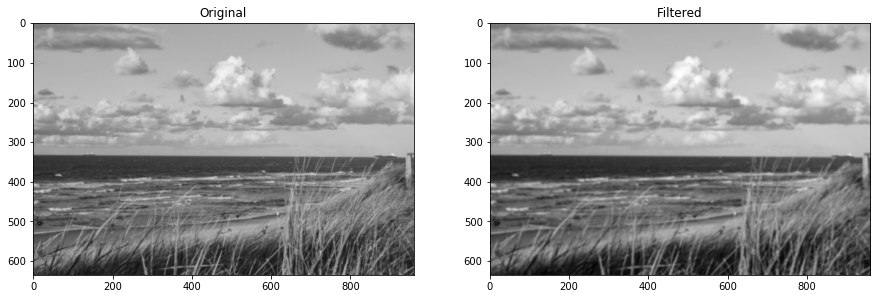

In [26]:
# when ddepth=-1, the output image will have the same depth as the source image
kernel = np.ones((5,5),np.float32)/25
target_img = cv.filter2D(img_gray,-1,kernel)            # image,ddepth, kernel
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic'),plt.title('Original')
plt.subplot(122),plt.imshow(target_img, cmap = 'gray', interpolation = 'bicubic'), plt.title('Filtered')
plt.show()

##  Gaussian blur


The kernel size defines the dimensions of the blur. It has to be an **odd** number and minimum size is 3.

In [37]:
@interact_manual
def gaussian_blurred(kernel_size=(3,20,2)):
    gray_blur = cv.GaussianBlur(img_gray, (kernel_size,kernel_size), 0) # img, (kernelsize,kernelsize), standard deviation
    plt.subplot(121),plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic'),plt.title('Original')
    blur_title = "Gaussian Blur - kernel size: "+ str(kernel_size) 
    plt.subplot(122),plt.imshow(gray_blur, cmap = 'gray', interpolation = 'bicubic'), plt.title(blur_title)
    plt.show()
    return

interactive(children=(IntSlider(value=11, description='kernel_size', max=20, min=3, step=2), Button(descriptio…